# **Importing** **Libarieries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# **Load The Data**

In [3]:
# Load your CSV
df = pd.read_csv("/content/PerformanceRating.csv")
df['ReviewDate'] =  pd.to_datetime(df['ReviewDate'], dayfirst=True, format='%d/%m/%Y')


# **JobSatisfaction Forcasting Plot**

<ipython-input-4-c59be30616b0>:2: FutureWarning: 'me' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df.resample('me', on='ReviewDate')['JobSatisfaction'].mean()
<ipython-input-4-c59be30616b0>:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=monthly_avg_cleaned.index[-1] + pd.offsets.MonthEnd(1), periods=12, freq='M')


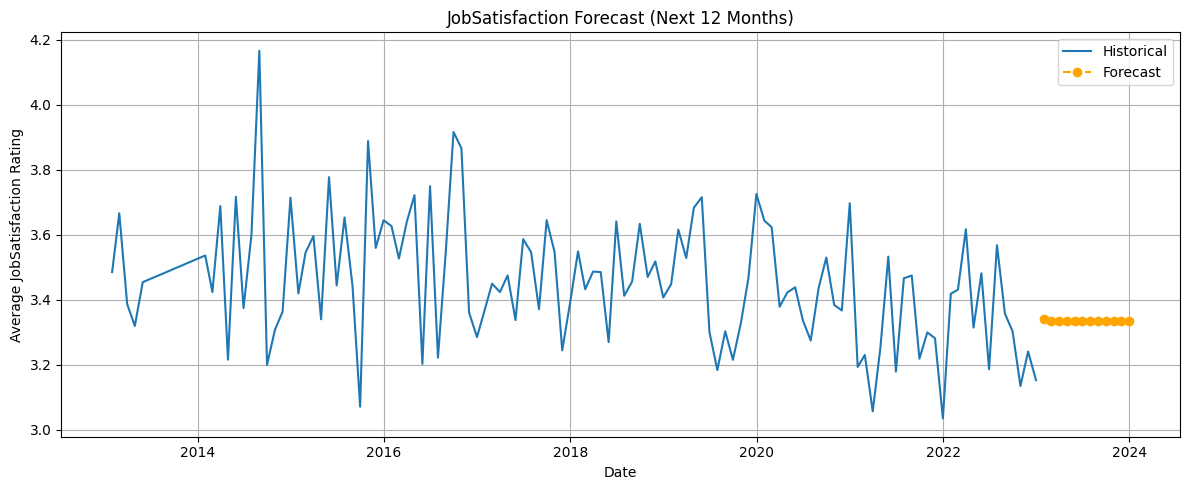

In [4]:
# Group and interpolate
monthly_avg = df.resample('me', on='ReviewDate')['JobSatisfaction'].mean()
monthly_avg_cleaned = monthly_avg.interpolate(method='linear')

# Fit ARIMA model
model = ARIMA(monthly_avg_cleaned, order=(1, 1, 1))
model_fit = model.fit()

# Forecast next 12 months
forecast = model_fit.forecast(steps=12)
forecast_index = pd.date_range(start=monthly_avg_cleaned.index[-1] + pd.offsets.MonthEnd(1), periods=12, freq='M')

# Plot
plt.figure(figsize=(12, 5))
plt.plot(monthly_avg_cleaned, label='Historical')
plt.plot(forecast_index, forecast, label='Forecast', color='orange', linestyle='--', marker='o')
plt.title('JobSatisfaction Forecast (Next 12 Months)')
plt.xlabel('Date')
plt.ylabel('Average JobSatisfaction Rating')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# **EnvironmentSatisfaction Forcasting Plot**

<ipython-input-7-c0baef2aae03>:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=monthly_avg_cleaned.index[-1] + pd.offsets.MonthEnd(1), periods=12, freq='M')


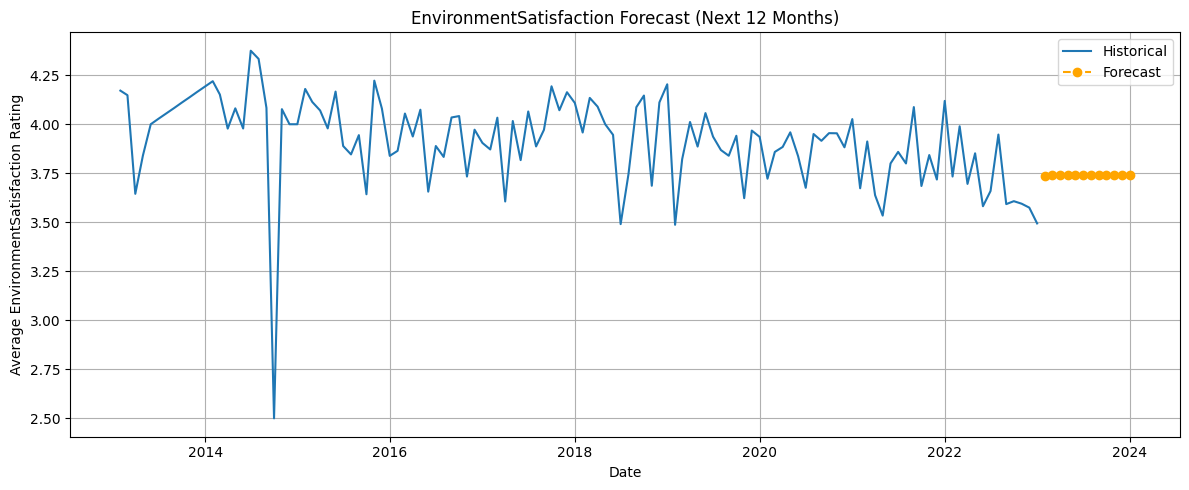

In [7]:
# Group and interpolate
monthly_avg = df.resample('ME', on='ReviewDate')['EnvironmentSatisfaction'].mean()
monthly_avg_cleaned = monthly_avg.interpolate(method='linear')

# Fit ARIMA model
model = ARIMA(monthly_avg_cleaned, order=(1, 1, 1))
model_fit = model.fit()

# Forecast next 12 months
forecast = model_fit.forecast(steps=12)
forecast_index = pd.date_range(start=monthly_avg_cleaned.index[-1] + pd.offsets.MonthEnd(1), periods=12, freq='M')

# Plot
plt.figure(figsize=(12, 5))
plt.plot(monthly_avg_cleaned, label='Historical')
plt.plot(forecast_index, forecast, label='Forecast', color='orange', linestyle='--', marker='o')
plt.title('EnvironmentSatisfaction Forecast (Next 12 Months)')
plt.xlabel('Date')
plt.ylabel('Average EnvironmentSatisfaction Rating')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# **RelationshipSatisfaction Forcasting Plot**

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
<ipython-input-8-4875b0be49ae>:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=monthly_avg_cleaned.index[-1] + pd.offsets.MonthEnd(1), periods=6, freq='M')


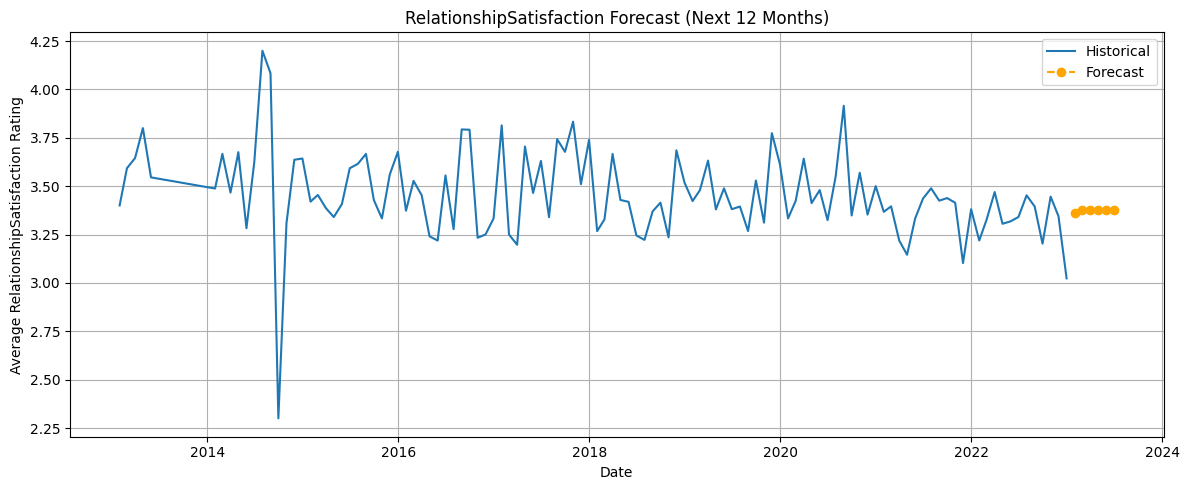

In [8]:
# Group and interpolate
monthly_avg = df.resample('ME', on='ReviewDate')['RelationshipSatisfaction'].mean()
monthly_avg_cleaned = monthly_avg.interpolate(method='linear')

# Fit ARIMA model
model = ARIMA(monthly_avg_cleaned, order=(1, 1, 1))
model_fit = model.fit()

# Forecast next 12 months
forecast = model_fit.forecast(steps=6)
forecast_index = pd.date_range(start=monthly_avg_cleaned.index[-1] + pd.offsets.MonthEnd(1), periods=6, freq='M')

# Plot
plt.figure(figsize=(12, 5))
plt.plot(monthly_avg_cleaned, label='Historical')
plt.plot(forecast_index, forecast, label='Forecast', color='orange', linestyle='--', marker='o')
plt.title('RelationshipSatisfaction Forecast (Next 12 Months)')
plt.xlabel('Date')
plt.ylabel('Average RelationshipSatisfaction Rating')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()